In [62]:
import pandas as pd
import statsmodels.formula.api as smf

# Data Cleaning

In [64]:
weather = pd.read_csv('weather_data_nyc_centralpark_2016(1).csv')
weather.head()

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,1-1-2016,42,34,38.0,0.00,0.0,0
1,2-1-2016,40,32,36.0,0.00,0.0,0
2,3-1-2016,45,35,40.0,0.00,0.0,0
3,4-1-2016,36,14,25.0,0.00,0.0,0
4,5-1-2016,29,11,20.0,0.00,0.0,0


In [65]:
w = weather[['date','average temperature','precipitation']]
w.head()

,date,average temperature,precipitation
0,1-1-2016,38.0,0.00
1,2-1-2016,36.0,0.00
2,3-1-2016,40.0,0.00
3,4-1-2016,25.0,0.00
4,5-1-2016,20.0,0.00


In [66]:
data = pd.read_csv('JoinedEvent2_CB2016_subset_800m.csv')
data.head()

,Unnamed: 0,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,...,usertype,birth year,gender,startdate,stopdate,Event_type,End_Time,weekday,O_date,O_hour
0,0,173,16:03:10,16:06:03,243,Fulton St & Rockwell Pl,40.688226,-73.979382,241,DeKalb Ave & S Portland Ave,...,Subscriber,1971.0,2,2016-01-01,2016-01-01,no-event,NaN,NaN,2016-01-01,16
1,1,136,16:05:54,16:08:11,420,Clermont Ave & Lafayette Ave,40.687645,-73.969689,270,Adelphi St & Myrtle Ave,...,Subscriber,1980.0,1,2016-01-01,2016-01-01,no-event,NaN,NaN,2016-01-01,16
2,2,653,16:13:47,16:24:40,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,278,Concord St & Bridge St,...,Subscriber,1976.0,1,2016-01-01,2016-01-01,no-event,NaN,NaN,2016-01-01,16
3,3,659,16:13:47,16:24:46,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,278,Concord St & Bridge St,...,Subscriber,1985.0,2,2016-01-01,2016-01-01,no-event,NaN,NaN,2016-01-01,16
4,4,1419,16:20:39,16:44:19,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,532,S 5 Pl & S 4 St,...,Subscriber,1993.0,1,2016-01-01,2016-01-01,no-event,NaN,NaN,2016-01-01,16


In [67]:
d = pd.DataFrame(data.groupby(['O_date','Event_type','O_hour'],as_index=False).size())
d.reset_index(inplace=True)
d.columns = ['O_date','Event_type','O_hour','Count']
d.head()

,O_date,Event_type,O_hour,Count
0,2016-01-01,no-event,16,8
1,2016-01-01,no-event,17,7
2,2016-01-01,no-event,18,4
3,2016-01-01,no-event,19,2
4,2016-01-01,no-event,20,2


# Data Merging

In [68]:
w['date'] = pd.to_datetime(w.date)
d['O_date'] = pd.to_datetime(d.O_date)
d = d.merge(w,left_on='O_date',right_on='date',how='left')

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [69]:
d.rename(columns={'average temperature':'temperature'},inplace=True)

# Data Engineering

In [70]:
# modify precipitation data type
d['precipitation'] = pd.to_numeric(d['precipitation'],errors='coerce')
d['precipitation'][d['precipitation'].isnull()] = 0
d.describe()

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,O_hour,Count,temperature,precipitation
count,2879.000000,2879.000000,2879.000000,2879.000000
mean,19.489406,20.891976,57.619660,0.109851
std,2.288399,17.545349,16.906403,0.289087
min,16.000000,1.000000,7.000000,0.000000
25%,17.000000,9.000000,44.500000,0.000000
50%,19.000000,16.000000,56.500000,0.000000
75%,21.000000,27.000000,74.000000,0.040000
max,23.000000,109.000000,88.500000,2.200000


In [71]:
# generate weekday, month, season
d['weekday'] = [i not in [5,6] for i in d['O_date'].dt.weekday.values]
d['O_month'] = pd.to_datetime(d['O_date']).dt.month
d['season'] = d['O_month'].map({1: 1,
                              2: 1,
                              3: 2,
                              4: 2,
                              5: 2,
                              6: 3,
                              7: 3,
                              8: 3,
                              9: 4,
                              10: 4,
                              11: 4,
                              12: 1})
d.head()

,O_date,Event_type,O_hour,Count,date,temperature,precipitation,weekday,O_month,season
0,2016-01-01,no-event,16,8,2016-01-01,38.0,0.0,True,1,1
1,2016-01-01,no-event,17,7,2016-01-01,38.0,0.0,True,1,1
2,2016-01-01,no-event,18,4,2016-01-01,38.0,0.0,True,1,1
3,2016-01-01,no-event,19,2,2016-01-01,38.0,0.0,True,1,1
4,2016-01-01,no-event,20,2,2016-01-01,38.0,0.0,True,1,1


# Regression Analysis
## All records (16-24)

In [72]:
# previous best model
lm5 = smf.ols(formula="Count ~ weekday + season * O_hour * C(Event_type, Treatment(reference='no-event'))",data=d).fit()
lm5.summary()

# f = open('lm5.txt', 'w')
# f.write(lm5.summary().as_text())
# f.close()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     93.93
Date:                Sat, 09 Dec 2017   Prob (F-statistic):               0.00
Time:                        20:21:18   Log-Likelihood:                -11391.
No. Observations:                2879   AIC:                         2.284e+04
Df Residuals:                    2850   BIC:                         2.301e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================================
                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                    -17.3744      6.823     -2.547      0.011     -30.752      -3.996
weekday[T.True]                                                                1.3571      0.545      2.489      0.013       0.288       2.426
C(Event_type, Treatment(reference='no-event'))[T.basketball]                  30.7881     12.807      2.404      0.016       5.677      55.900
C(Event_type, Treatment(reference='no-event'))[T.boxing]                      84.3749     35.322      2.389      0.017      15.116     153.634
C(Event_type, Treatment(reference='no-event'))[T.concert]                    -27.8251     22.024     -1.263      0.207     -71.010      15.359
C(Event_type, Treatment(reference='no-event'))[T.family]                      88.5216     51.958      1.704      0.089     -13.357     190.400
C(Event_type, Treatment(reference='no-event'))[T.hockey]                      77.9004     18.918      4.118      0.000      40.805     114.996
C(Event_type, Treatment(reference='no-event'))[T.other]                       20.3641     40.326      0.505      0.614     -58.706      99.434
season                                                                        31.7726      2.563     12.397      0.000      26.747      36.798
season:C(Event_type, Treatment(reference='no-event'))[T.basketball]          -10.8377      4.976     -2.178      0.029     -20.595      -1.080
season:C(Event_type, Treatment(reference='no-event'))[T.boxing]              -29.3775     14.353     -2.047      0.041     -57.520      -1.235
season:C(Event_type, Treatment(reference='no-event'))[T.concert]               8.9187      7.724      1.155      0.248      -6.226      24.063
season:C(Event_type, Treatment(reference='no-event'))[T.family]              -15.4198     13.655     -1.129      0.259     -42.194      11.354
season:C(Event_type, Treatment(reference='no-event'))[T.hockey]              -12.9605      6.028     -2.150      0.032     -24.781      -1.141
season:C(Event_type, Treatment(reference='no-event'))[T.other]                -1.9350     13.196     -0.147      0.883     -27.809      23.939
O_hour                                                                         0.6494      0.348      1.868      0.062      -0.032       1.331
O_hour:C(Event_type, Treatment(reference='no-event'))[T.basketball]           -1.1641      0.653     -1.783      0.075      -2.444       0.116
O_hour:C(Event_type, Treatment(reference='no-event'))[T.boxing]               -3.5239      1.804     -1.953      0.051      -7.062       0.014
O_hour:C(Event_type, Treatment(reference='no-event'))[T.concert]               1

In [73]:
# add weather vars
lm6 = smf.ols(formula="Count ~ weekday + precipitation + temperature + season * O_hour * C(Event_type, Treatment(reference='no-event'))",data=d).fit()
lm6.summary()

# f = open('lm6.txt', 'w')
# f.write(lm6.summary().as_text())
# f.close()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     90.24
Date:                Sat, 09 Dec 2017   Prob (F-statistic):               0.00
Time:                        20:21:30   Log-Likelihood:                -11371.
No. Observations:                2879   AIC:                         2.280e+04
Df Residuals:                    2848   BIC:                         2.299e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================================
                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                    -15.8495      6.803     -2.330      0.020     -29.189      -2.510
weekday[T.True]                                                                1.3963      0.542      2.578      0.010       0.334       2.458
C(Event_type, Treatment(reference='no-event'))[T.basketball]                  30.0250     12.722      2.360      0.018       5.080      54.970
C(Event_type, Treatment(reference='no-event'))[T.boxing]                      84.2040     35.082      2.400      0.016      15.415     152.993
C(Event_type, Treatment(reference='no-event'))[T.concert]                    -28.7988     21.876     -1.316      0.188     -71.692      14.095
C(Event_type, Treatment(reference='no-event'))[T.family]                      88.4005     51.608      1.713      0.087     -12.792     189.593
C(Event_type, Treatment(reference='no-event'))[T.hockey]                      77.6330     18.791      4.131      0.000      40.788     114.478
C(Event_type, Treatment(reference='no-event'))[T.other]                       19.0004     40.055      0.474      0.635     -59.539      97.540
precipitation                                                                 -5.1557      0.834     -6.182      0.000      -6.791      -3.520
temperature                                                                   -0.0229      0.015     -1.506      0.132      -0.053       0.007
season                                                                        31.9443      2.548     12.536      0.000      26.948      36.941
season:C(Event_type, Treatment(reference='no-event'))[T.basketball]          -10.7128      4.944     -2.167      0.030     -20.407      -1.019
season:C(Event_type, Treatment(reference='no-event'))[T.boxing]              -29.1979     14.255     -2.048      0.041     -57.149      -1.246
season:C(Event_type, Treatment(reference='no-event'))[T.concert]               9.0402      7.671      1.178      0.239      -6.002      24.082
season:C(Event_type, Treatment(reference='no-event'))[T.family]              -15.4309     13.563     -1.138      0.255     -42.025      11.163
season:C(Event_type, Treatment(reference='no-event'))[T.hockey]              -12.9257      5.988     -2.159      0.031     -24.667      -1.185
season:C(Event_type, Treatment(reference='no-event'))[T.other]                -1.1091     13.108     -0.085      0.933     -26.811      24.592
O_hour                                                                         0.6515      0.345      1.887      0.059      -0.026       1.329
O_hour:C(Event_type, Treatment(reference='no-event'))[T.basketball]           -1

## Subset records (19-24)

In [74]:
d = d[d['O_hour']>18]

In [75]:
lm7 = smf.ols(formula="Count ~ weekday + precipitation + temperature + season * O_hour * C(Event_type, Treatment(reference='no-event'))",data=d).fit()
lm7.summary()

# f = open('lm3.txt', 'w')
# f.write(lm3.summary().as_text())
# f.close()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     85.30
Date:                Sat, 09 Dec 2017   Prob (F-statistic):          6.51e-317
Time:                        20:21:52   Log-Likelihood:                -6542.0
No. Observations:                1795   AIC:                         1.315e+04
Df Residuals:                    1764   BIC:                         1.332e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================================
                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                    -32.4875     11.082     -2.931      0.003     -54.224     -10.751
weekday[T.True]                                                                4.7082      0.508      9.272      0.000       3.712       5.704
C(Event_type, Treatment(reference='no-event'))[T.basketball]                  50.2078     20.680      2.428      0.015       9.648      90.767
C(Event_type, Treatment(reference='no-event'))[T.boxing]                     103.5489     56.704      1.826      0.068      -7.665     214.763
C(Event_type, Treatment(reference='no-event'))[T.concert]                    -53.4284     35.489     -1.505      0.132    -123.034      16.177
C(Event_type, Treatment(reference='no-event'))[T.family]                     112.7382     83.862      1.344      0.179     -51.742     277.218
C(Event_type, Treatment(reference='no-event'))[T.hockey]                      80.0080     30.556      2.618      0.009      20.079     139.937
C(Event_type, Treatment(reference='no-event'))[T.other]                        4.9927     65.092      0.077      0.939    -122.673     132.659
precipitation                                                                 -3.7322      0.781     -4.782      0.000      -5.263      -2.201
temperature                                                                    0.0079      0.014      0.556      0.578      -0.020       0.036
season                                                                        53.5440      4.155     12.886      0.000      45.395      61.694
season:C(Event_type, Treatment(reference='no-event'))[T.basketball]          -19.0285      8.036     -2.368      0.018     -34.790      -3.267
season:C(Event_type, Treatment(reference='no-event'))[T.boxing]              -57.9358     23.080     -2.510      0.012    -103.204     -12.668
season:C(Event_type, Treatment(reference='no-event'))[T.concert]              13.9316     12.450      1.119      0.263     -10.487      38.351
season:C(Event_type, Treatment(reference='no-event'))[T.family]              -28.7579     22.040     -1.305      0.192     -71.985      14.470
season:C(Event_type, Treatment(reference='no-event'))[T.hockey]              -11.4470      9.736     -1.176      0.240     -30.543       7.649
season:C(Event_type, Treatment(reference='no-event'))[T.other]               -16.7088     21.300     -0.784      0.433     -58.484      25.066
O_hour                                                                         1.2847      0.526      2.442      0.015       0.253       2.317
O_hour:C(Event_type, Treatment(reference='no-event'))[T.basketball]           -2

## Subset records (w/o other events)

In [76]:
print(len(d))
d = d[d['Event_type'] != 'other']
print(len(d))

1795
1760


In [77]:
lm8 = smf.ols(formula="Count ~ weekday + precipitation + temperature + season * O_hour * C(Event_type, Treatment(reference='no-event'))",data=d).fit()
lm8.summary()

# f = open('lm3.txt', 'w')
# f.write(lm3.summary().as_text())
# f.close()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     96.74
Date:                Sat, 09 Dec 2017   Prob (F-statistic):          2.90e-314
Time:                        20:22:25   Log-Likelihood:                -6422.6
No. Observations:                1760   AIC:                         1.290e+04
Df Residuals:                    1733   BIC:                         1.305e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================================
                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                    -32.5624     11.123     -2.927      0.003     -54.379     -10.746
weekday[T.True]                                                                4.9146      0.515      9.540      0.000       3.904       5.925
C(Event_type, Treatment(reference='no-event'))[T.basketball]                  50.1976     20.756      2.418      0.016       9.489      90.907
C(Event_type, Treatment(reference='no-event'))[T.boxing]                     103.5443     56.912      1.819      0.069      -8.079     215.168
C(Event_type, Treatment(reference='no-event'))[T.concert]                    -53.4074     35.620     -1.499      0.134    -123.269      16.455
C(Event_type, Treatment(reference='no-event'))[T.family]                     112.7383     84.170      1.339      0.181     -52.347     277.824
C(Event_type, Treatment(reference='no-event'))[T.hockey]                      80.0174     30.668      2.609      0.009      19.868     140.167
precipitation                                                                 -3.5236      0.806     -4.369      0.000      -5.105      -1.942
temperature                                                                    0.0058      0.014      0.404      0.686      -0.022       0.034
season                                                                        53.5545      4.170     12.842      0.000      45.375      61.734
season:C(Event_type, Treatment(reference='no-event'))[T.basketball]          -19.0405      8.066     -2.361      0.018     -34.860      -3.221
season:C(Event_type, Treatment(reference='no-event'))[T.boxing]              -57.8950     23.165     -2.499      0.013    -103.329     -12.461
season:C(Event_type, Treatment(reference='no-event'))[T.concert]              13.9323     12.496      1.115      0.265     -10.577      38.441
season:C(Event_type, Treatment(reference='no-event'))[T.family]              -28.7516     22.121     -1.300      0.194     -72.138      14.635
season:C(Event_type, Treatment(reference='no-event'))[T.hockey]              -11.4573      9.772     -1.172      0.241     -30.624       7.709
O_hour                                                                         1.2853      0.528      2.434      0.015       0.250       2.321
O_hour:C(Event_type, Treatment(reference='no-event'))[T.basketball]           -2.1673      0.987     -2.195      0.028      -4.104      -0.231
O_hour:C(Event_type, Treatment(reference='no-event'))[T.boxing]               -4.5053      2.704     -1.666      0.096      -9.808       0.797
O_hour:C(Event_type, Treatment(reference='no-event'))[T.concert]               2

# Split Training and test set

In [79]:
data.head()

,Unnamed: 0,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,...,usertype,birth year,gender,startdate,stopdate,Event_type,End_Time,weekday,O_date,O_hour
0,0,173,16:03:10,16:06:03,243,Fulton St & Rockwell Pl,40.688226,-73.979382,241,DeKalb Ave & S Portland Ave,...,Subscriber,1971.0,2,2016-01-01,2016-01-01,no-event,NaN,NaN,2016-01-01,16
1,1,136,16:05:54,16:08:11,420,Clermont Ave & Lafayette Ave,40.687645,-73.969689,270,Adelphi St & Myrtle Ave,...,Subscriber,1980.0,1,2016-01-01,2016-01-01,no-event,NaN,NaN,2016-01-01,16
2,2,653,16:13:47,16:24:40,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,278,Concord St & Bridge St,...,Subscriber,1976.0,1,2016-01-01,2016-01-01,no-event,NaN,NaN,2016-01-01,16
3,3,659,16:13:47,16:24:46,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,278,Concord St & Bridge St,...,Subscriber,1985.0,2,2016-01-01,2016-01-01,no-event,NaN,NaN,2016-01-01,16
4,4,1419,16:20:39,16:44:19,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,532,S 5 Pl & S 4 St,...,Subscriber,1993.0,1,2016-01-01,2016-01-01,no-event,NaN,NaN,2016-01-01,16


In [80]:
len(data)

60148

In [82]:
stdate = data.O_date.unique()
sthour = data.O_hour.unique()

In [83]:
from sklearn.model_selection import train_test_split

In [85]:
train = pd.DataFrame()
test = pd.DataFrame()

In [86]:
for i in stdate:
    for j in sthour:
        X_train, X_test = train_test_split(data[(data['O_date']==i)&(data['O_hour']==j)], 
                                           test_size = 0.3, random_state = 200)
        train = pd.concat([train,X_train])
        test = pd.concat([test,X_test])


In [99]:
d.head()

,O_date,Event_type,O_hour,Count,date,temperature,precipitation,weekday,O_month,season
3,2016-01-01,no-event,19,2,2016-01-01,38.0,0.0,True,1,1
4,2016-01-01,no-event,20,2,2016-01-01,38.0,0.0,True,1,1
5,2016-01-01,no-event,21,1,2016-01-01,38.0,0.0,True,1,1
6,2016-01-01,no-event,22,4,2016-01-01,38.0,0.0,True,1,1
7,2016-01-01,no-event,23,3,2016-01-01,38.0,0.0,True,1,1


In [117]:
train, test = train_test_split(d, 
                                           test_size = 0.3, random_state = 200)

In [118]:
len(train),len(test)

(1232, 528)

In [119]:
len(train)+len(test)

1760

In [105]:
train.head(1)

,O_date,Event_type,O_hour,Count,date,temperature,precipitation,weekday,O_month,season
1702,2016-08-06,no-event,23,9,2016-08-06,59.5,0.45,False,8,3


In [90]:
d_train = pd.DataFrame(train.groupby(['O_date','Event_type','O_hour'],as_index=False).size())
d_train.reset_index(inplace=True)
d_train.columns = ['O_date','Event_type','O_hour','Count']
d_train.head()

,O_date,Event_type,O_hour,Count
0,2016-01-01,no-event,16,5
1,2016-01-01,no-event,17,4
2,2016-01-01,no-event,18,2
3,2016-01-01,no-event,19,1
4,2016-01-01,no-event,20,1


In [91]:
d_test = pd.DataFrame(test.groupby(['O_date','Event_type','O_hour'],as_index=False).size())
d_test.reset_index(inplace=True)
d_test.columns = ['O_date','Event_type','O_hour','Count']
d_test.head()

,O_date,Event_type,O_hour,Count
0,2016-01-01,no-event,16,3
1,2016-01-01,no-event,17,3
2,2016-01-01,no-event,18,2
3,2016-01-01,no-event,19,1
4,2016-01-01,no-event,20,1


In [92]:
w['date'] = pd.to_datetime(w.date)
d_train['O_date'] = pd.to_datetime(d_train.O_date)
d_test['O_date'] = pd.to_datetime(d_test.O_date)

d_train = d_train.merge(w,left_on='O_date',right_on='date',how='left')
d_test = d_test.merge(w,left_on='O_date',right_on='date',how='left')
d_train.rename(columns={'average temperature':'temperature'},inplace=True)
d_test.rename(columns={'average temperature':'temperature'},inplace=True)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [93]:
d_train['precipitation'] = pd.to_numeric(d_train['precipitation'],errors='coerce')
d_train['precipitation'][d_train['precipitation'].isnull()] = 0

d_test['precipitation'] = pd.to_numeric(d_test['precipitation'],errors='coerce')
d_test['precipitation'][d_test['precipitation'].isnull()] = 0


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [94]:
# generate weekday, month, season
d_train['weekday'] = [i not in [5,6] for i in d_train['O_date'].dt.weekday.values]
d_train['O_month'] = pd.to_datetime(d_train['O_date']).dt.month
d_train['season'] = d_train['O_month'].map({1: 1,
                              2: 1,
                              3: 2,
                              4: 2,
                              5: 2,
                              6: 3,
                              7: 3,
                              8: 3,
                              9: 4,
                              10: 4,
                              11: 4,
                              12: 1})
d_train.head()

,O_date,Event_type,O_hour,Count,date,temperature,precipitation,weekday,O_month,season
0,2016-01-01,no-event,16,5,2016-01-01,38.0,0.0,True,1,1
1,2016-01-01,no-event,17,4,2016-01-01,38.0,0.0,True,1,1
2,2016-01-01,no-event,18,2,2016-01-01,38.0,0.0,True,1,1
3,2016-01-01,no-event,19,1,2016-01-01,38.0,0.0,True,1,1
4,2016-01-01,no-event,20,1,2016-01-01,38.0,0.0,True,1,1


In [95]:
# generate weekday, month, season
d_test['weekday'] = [i not in [5,6] for i in d_test['O_date'].dt.weekday.values]
d_test['O_month'] = pd.to_datetime(d_test['O_date']).dt.month
d_test['season'] = d_test['O_month'].map({1: 1,
                              2: 1,
                              3: 2,
                              4: 2,
                              5: 2,
                              6: 3,
                              7: 3,
                              8: 3,
                              9: 4,
                              10: 4,
                              11: 4,
                              12: 1})
d_test.head()

,O_date,Event_type,O_hour,Count,date,temperature,precipitation,weekday,O_month,season
0,2016-01-01,no-event,16,3,2016-01-01,38.0,0.0,True,1,1
1,2016-01-01,no-event,17,3,2016-01-01,38.0,0.0,True,1,1
2,2016-01-01,no-event,18,2,2016-01-01,38.0,0.0,True,1,1
3,2016-01-01,no-event,19,1,2016-01-01,38.0,0.0,True,1,1
4,2016-01-01,no-event,20,1,2016-01-01,38.0,0.0,True,1,1


In [96]:
d_train.to_csv('trainset.csv')
d_test.to_csv('testset.csv')

# Run regression model

In [120]:
train = train[train['O_hour']>18]
print(len(train))
train = train[train['Event_type'] != 'other']
print(len(train))

1232
1232


In [142]:
len(train),len(test)

(1232, 528)

In [143]:
lm_train = smf.ols(formula="Count ~ weekday + precipitation + temperature + season * O_hour * C(Event_type, Treatment(reference='no-event'))",data=train).fit()
lm_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     69.00
Date:                Sat, 09 Dec 2017   Prob (F-statistic):          2.95e-217
Time:                        22:35:39   Log-Likelihood:                -4470.3
No. Observations:                1232   AIC:                             8995.
Df Residuals:                    1205   BIC:                             9133.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================================
                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                    -37.5388     13.047     -2.877      0.004     -63.135     -11.942
weekday[T.True]                                                                5.0632      0.605      8.369      0.000       3.876       6.250
C(Event_type, Treatment(reference='no-event'))[T.basketball]                  35.9104     24.072      1.492      0.136     -11.317      83.138
C(Event_type, Treatment(reference='no-event'))[T.boxing]                      49.6517     74.561      0.666      0.506     -96.633     195.936
C(Event_type, Treatment(reference='no-event'))[T.concert]                     -7.6921     38.893     -0.198      0.843     -83.997      68.613
C(Event_type, Treatment(reference='no-event'))[T.family]                     -11.1514    391.290     -0.028      0.977    -778.837     756.534
C(Event_type, Treatment(reference='no-event'))[T.hockey]                      57.8075     38.917      1.485      0.138     -18.545     134.160
precipitation                                                                 -3.9399      0.948     -4.154      0.000      -5.801      -2.079
temperature                                                                    0.0001      0.017      0.006      0.995      -0.033       0.033
season                                                                        55.6036      4.854     11.455      0.000      46.080      65.127
season:C(Event_type, Treatment(reference='no-event'))[T.basketball]          -11.7128      9.580     -1.223      0.222     -30.508       7.082
season:C(Event_type, Treatment(reference='no-event'))[T.boxing]              -35.5886     30.889     -1.152      0.249     -96.191      25.014
season:C(Event_type, Treatment(reference='no-event'))[T.concert]              -4.7407     13.882     -0.342      0.733     -31.975      22.494
season:C(Event_type, Treatment(reference='no-event'))[T.family]               -3.9839     98.262     -0.041      0.968    -196.767     188.800
season:C(Event_type, Treatment(reference='no-event'))[T.hockey]              -13.6369     12.293     -1.109      0.268     -37.754      10.481
O_hour                                                                         1.5383      0.620      2.480      0.013       0.321       2.755
O_hour:C(Event_type, Treatment(reference='no-event'))[T.basketball]           -1.5578      1.144     -1.362      0.174      -3.803       0.687
O_hour:C(Event_type, Treatment(reference='no-event'))[T.boxing]               -2.0420      3.542     -0.576      0.564      -8.992       4.908
O_hour:C(Event_type, Treatment(reference='no-event'))[T.concert]               0

In [122]:
test.keys()

Index([u'O_date', u'Event_type', u'O_hour', u'Count', u'date', u'temperature',
       u'precipitation', u'weekday', u'O_month', u'season'],
      dtype='object')

In [124]:
pre = lm_train.predict(test[["weekday","precipitation","temperature","season","O_hour","Event_type"]])

In [125]:
len(pre)

528

In [127]:
len(test['Count'])

528

In [111]:
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


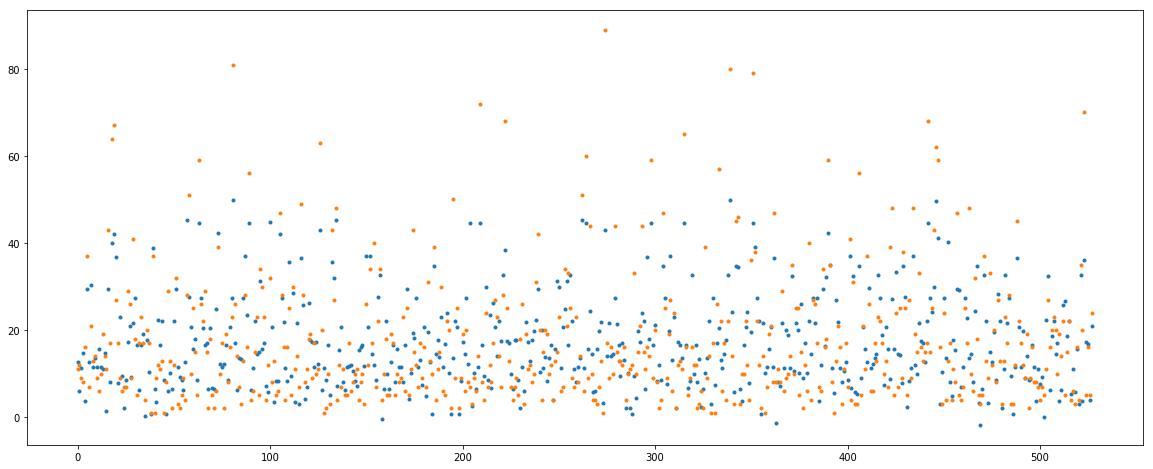

In [134]:
x = range(528)
pl.figure(figsize=(20,8))
pl.plot(x,pre,'.')
pl.plot(x,test.Count,'.')

In [144]:
# For displaying R^2 and linear model summary
def modelEval(lm, key = 'Count'):
    lmy = lm.predict(test[["weekday","precipitation","temperature","season","O_hour","Event_type"]])
    y_err = (lmy - test[key]).reshape(test[key].shape[0],)
    y_norm = (test[key]-np.mean(test[key])).reshape(test[key].shape[0],)
    
    #y_err = (predicted - test_y).reshape(test_y.shape[0],)
    #y_norm = (test_y-np.mean(test_y)).reshape(test_y.shape[0],)
    #r2 = 1-y_err.dot(y_err)/y_norm.dot(y_norm)
    return 1-y_err.dot(y_err)/y_norm.dot(y_norm)  # R2 w.r.t. test set

In [145]:
#result = smf.ols(formula = 'Y ~ '+ '+'.join(data3.columns[:-1]), data = train).fit()
print('In sample R-squared: %f'%lm_train.rsquared)
print('Out of sample R-squared: %f'%modelEval(lm_train))
print('Fitted coefficients:')
print lm_train.params

In sample R-squared: 0.598213
Out of sample R-squared: 0.560644
Fitted coefficients:
Intercept                                                                    -37.538774
weekday[T.True]                                                                5.063213
C(Event_type, Treatment(reference='no-event'))[T.basketball]                  35.910380
C(Event_type, Treatment(reference='no-event'))[T.boxing]                      49.651734
C(Event_type, Treatment(reference='no-event'))[T.concert]                     -7.692139
C(Event_type, Treatment(reference='no-event'))[T.family]                     -11.151385
C(Event_type, Treatment(reference='no-event'))[T.hockey]                      57.807493
precipitation                                                                 -3.939891
temperature                                                                    0.000103
season                                                                        55.603647
season:C(Event_type, Treatment(refe

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
